<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/IGN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

In [23]:
ign_df = pd.read_csv('ign.csv')
ign_df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


In [24]:
class CustomKMeans:
    def __init__(self, k):
        self.k = k
        self.kmeans = KMeans(n_clusters=self.k)

    def fit(self, data):
        #Fits the KMeans model to the data
        self.kmeans.fit(data)

    def predict(self, data):
        #Predicts the cluster for each sample in the data
        return self.kmeans.predict(data)

    def get_labels(self):
        #Returns the cluster labels
        return self.kmeans.labels_

        #sse method
    def get_cluster_centers(self):
        #Returns the cluster center
        return self.kmeans.cluster_centers_

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ign_df['genre_encoded'] = label_encoder.fit_transform(ign_df['genre'])

ign_df['genre_encoded'] = ign_df['genre_encoded'].astype(float)

predict:  [0 1 0 ... 0 1 0]
labels [0 1 0 ... 0 1 0]
Cluster centers:  [[ 6.98853456 68.33271889]
 [ 6.82319779  6.42963473]
 [ 7.07101766 94.15475189]]


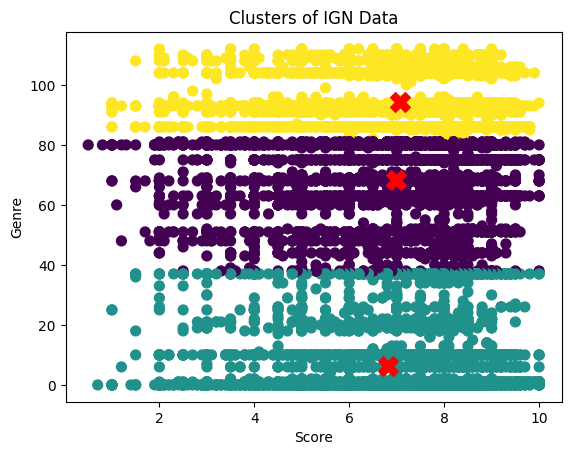

In [26]:
# Implement the k-means algorithm on your dataset
custom_kmeans = CustomKMeans(k=3)
custom_kmeans.fit(ign_df[['score', 'genre_encoded']])
predict = custom_kmeans.predict(ign_df[['score', 'genre_encoded']])
labels = custom_kmeans.get_labels()
get_cluster = custom_kmeans.get_cluster_centers()

print('predict: ', predict)
print('labels', labels)
print('Cluster centers: ', get_cluster)

plt.scatter(ign_df['score'], ign_df['genre_encoded'], c=predict, s=50, cmap='viridis')
plt.scatter(get_cluster[:, 0], get_cluster[:, 1], s=200, c='red', marker='X')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.title('Clusters of IGN Data')
plt.show()

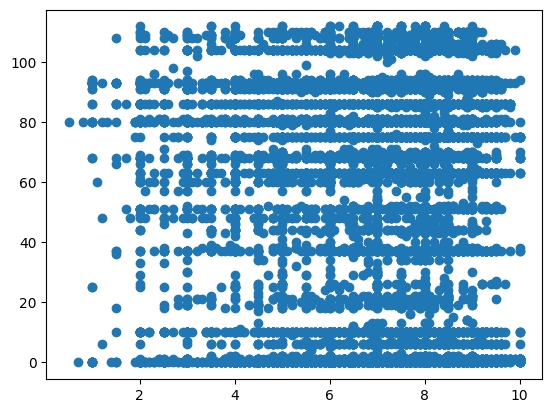

In [27]:
#Select a set of columns to cluster over
plt.scatter(ign_df["score"], ign_df["genre_encoded"])
plt.show()


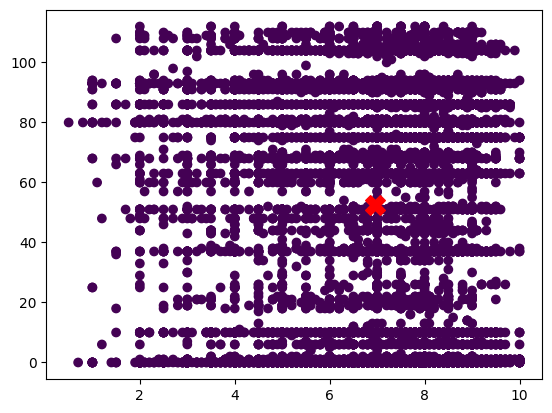

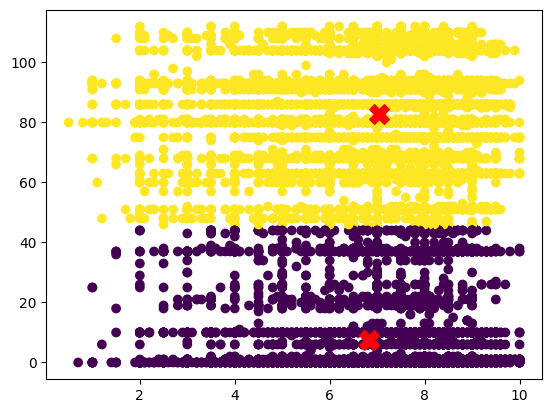

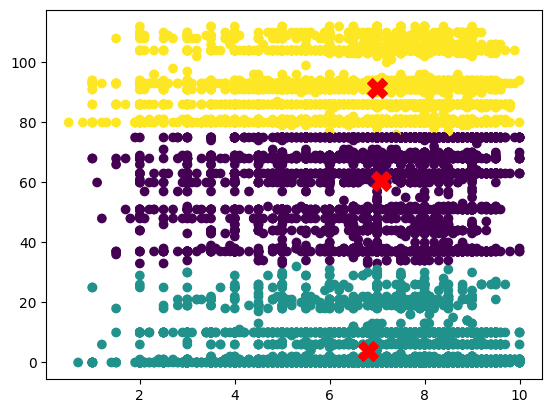

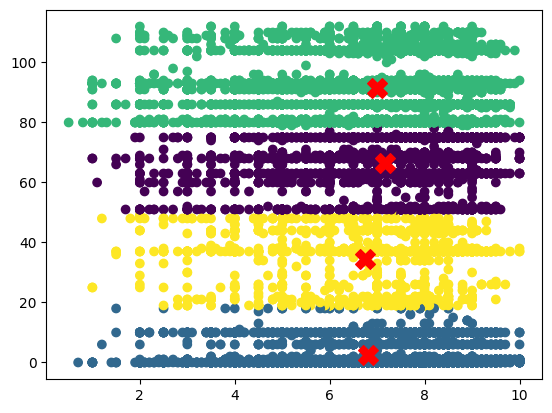

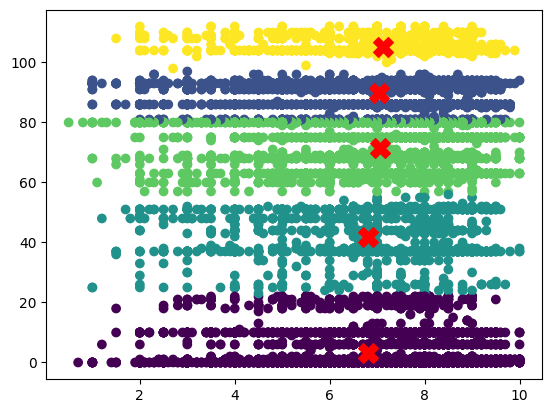

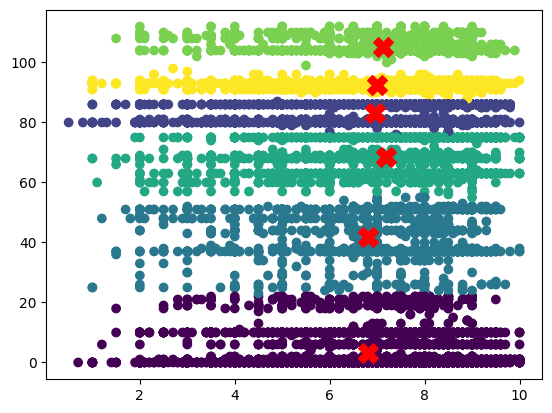

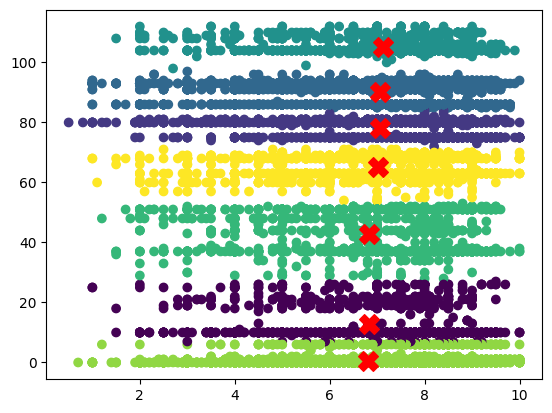

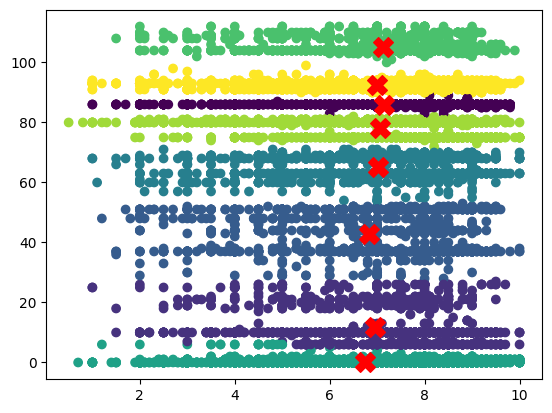

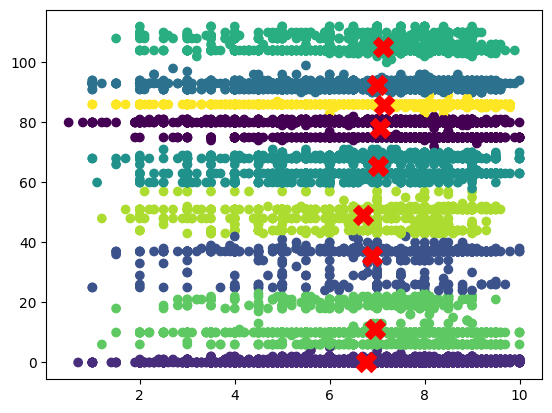

In [28]:
# Run your clustering algorithm and try several k values
def plot_clusters(ign_df, custom_kmeans):
    plt.scatter(ign_df["score"], ign_df["genre_encoded"], c=custom_kmeans.get_labels(), cmap='viridis')
    plt.scatter(custom_kmeans.get_cluster_centers()[:, 0], custom_kmeans.get_cluster_centers()[:, 1], s=200, c='red', marker='X')

for i in range(1,10):
    custom_kmeans = CustomKMeans(i)
    custom_kmeans.fit(ign_df[['score', 'genre_encoded']])
    custom_kmeans.predict(ign_df[['score', 'genre_encoded']])
    plot_clusters(ign_df, custom_kmeans)
    plt.show()



Cluster centers:  [[ 7.00137894 91.40137894]
 [ 6.80632304  3.78348816]
 [ 7.07898551 60.55226175]]
Inertia:  1631478.1317543508


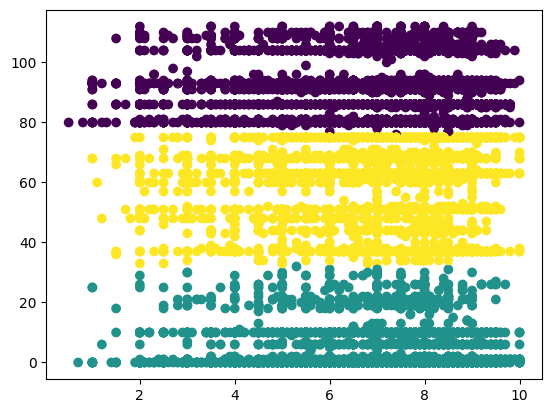

In [29]:
# Run the sklearn KMeans algorithm and see if you get same or similar results
km = KMeans(n_clusters=3)
km = km.fit(ign_df[['score', 'genre_encoded']])
km.predict(ign_df[['score', 'genre_encoded']])
print('Cluster centers: ', km.cluster_centers_)
print('Inertia: ', km.inertia_)

plt.scatter(ign_df["score"], ign_df["genre_encoded"], c=km.labels_)
plt.show()

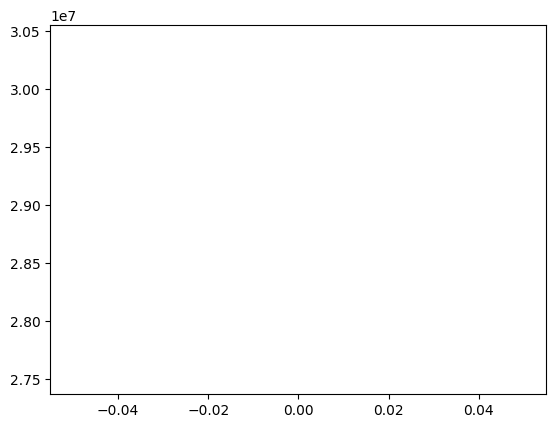

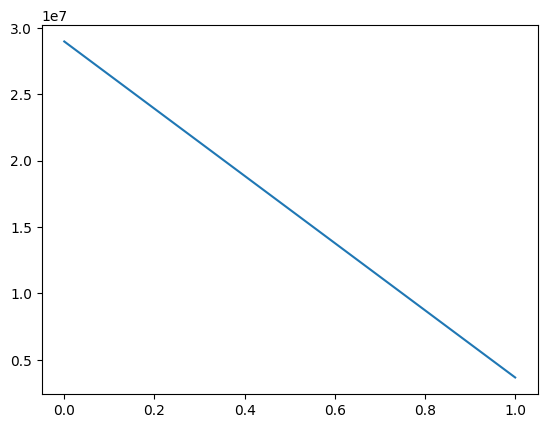

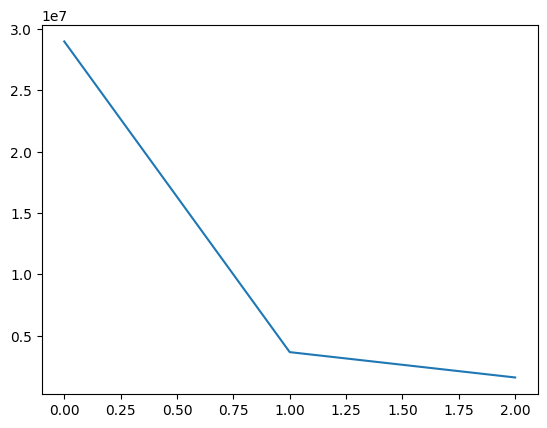

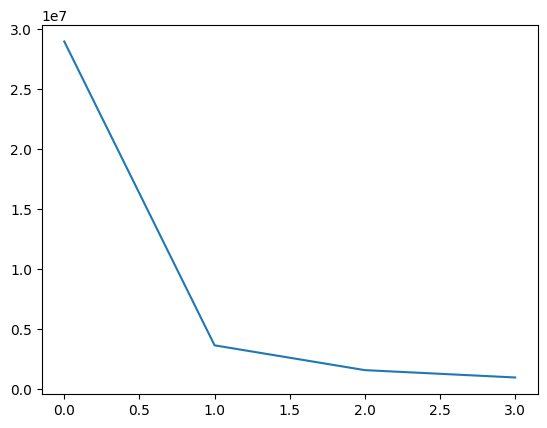

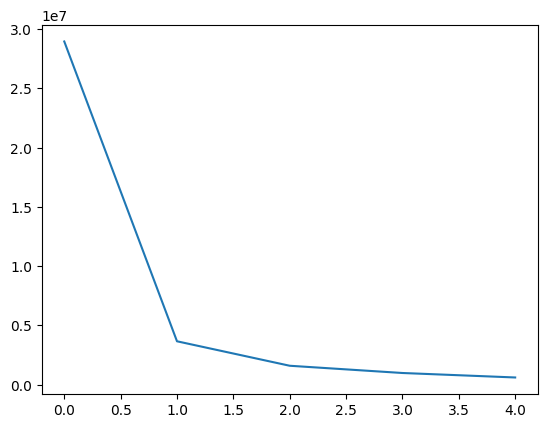

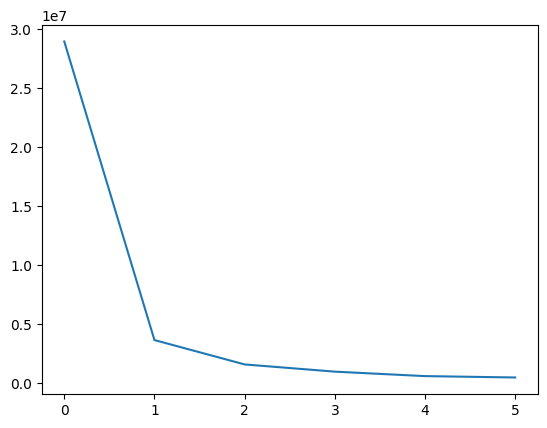

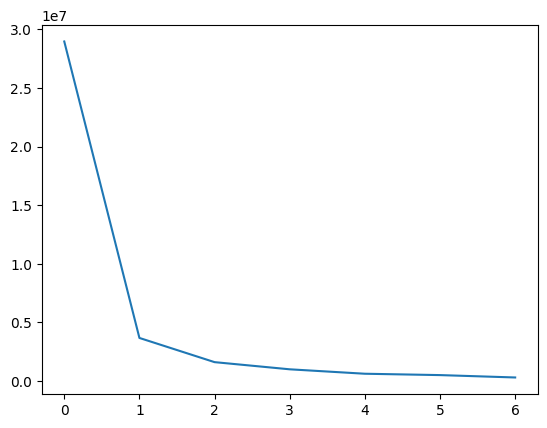

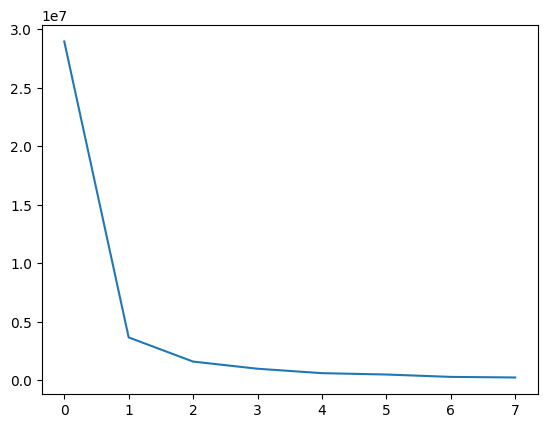

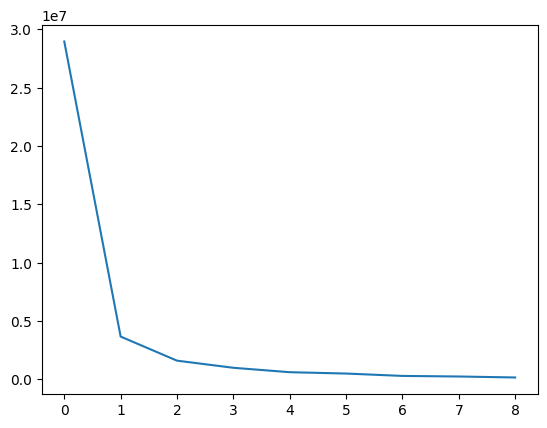

In [31]:
# What k value is works best?
#It seems like k value of 1 works best based off the graphs
inertia = []
for i in range(1,10):
  km = KMeans(n_clusters=i)
  km = km.fit(ign_df[['score', 'genre_encoded']])
  km.predict(ign_df[['score', 'genre_encoded']])
  inertia.append(km.inertia_)

  plt.plot(inertia)
  plt.show()

In [32]:
#Analysis: Look for similarities among the data that was clustered. Does it indicate anything interesting were any meaningful clusters found?

#From what I saw in the scatter plots was that most game genres averaged a score of around 7